In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from utils.helpers import *
import keras
from keras import layers
from keras import models
from keras import optimizers
import numpy as np
from matplotlib.pyplot import imshow
import h5py
%matplotlib inline
keras.__version__

Using TensorFlow backend.


'2.1.3'

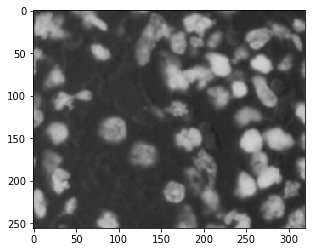

In [43]:
IMAGE_ID = 3
PADDING = 47
image, mask = get_image_mask_from_id(IMAGE_ID)
image = image / 255.
imshow(image)

In [47]:
test = image
H, W, C = test.shape
type(H)

int

In [48]:
test.shape

(256, 320, 3)

In [7]:
old_model = models.load_model("new_state.h5")

In [8]:
Ws = []
bs = []
for layer in old_model.layers:
    if len(layer.get_weights()) > 0:
        W, b = layer.get_weights()
        Ws.append(W)
        bs.append(b)
        
Ws[4] = Ws[4].reshape(4,4,256,200)
Ws[5] = Ws[5].reshape(1,1,200,3)

for w in Ws:
    print(w.shape)

(5, 5, 3, 32)
(5, 5, 32, 64)
(5, 5, 64, 128)
(5, 5, 128, 256)
(4, 4, 256, 200)
(1, 1, 200, 3)


In [109]:
img_input = layers.Input(shape=(H, W, C))
x = layers.Conv2D(32, (5, 5), activation='relu', name="CONV1")(img_input)
x = layers.MaxPooling2D((2, 2), name="MP1")(x)
x = layers.Conv2D(64, (5, 5), activation='relu', name="CONV2", weights=[Ws[1],bs[1]])(x)
x = layers.MaxPooling2D((2, 2), name="MP2")(x)
x = layers.Conv2D(128, (5, 5), activation='relu', name="CONV3", weights=[Ws[2],bs[2]])(x)
x = layers.MaxPooling2D((2, 2), name="MP3")(x)
x = layers.Conv2D(256, (5, 5), activation='relu', name="CONV4", weights=[Ws[3],bs[3]])(x)
x = layers.Convolution2D(200, (4, 4), activation='relu', name="REP0", weights=[Ws[4],bs[4]])(x)
x = layers.Conv2D(3, (1, 1), activation='relu', name="REP2", weights=[Ws[5],bs[5]])(x)
model = models.Model(inputs = img_input, outputs = x)
# model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 360, 360, 3)       0         
_________________________________________________________________
CONV1 (Conv2D)               (None, 356, 356, 32)      2432      
_________________________________________________________________
MP1 (MaxPooling2D)           (None, 178, 178, 32)      0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 174, 174, 64)      51264     
_________________________________________________________________
MP2 (MaxPooling2D)           (None, 87, 87, 64)        0         
_________________________________________________________________
CONV3 (Conv2D)               (None, 83, 83, 128)       204928    
_________________________________________________________________
MP3 (MaxPooling2D)           (None, 41, 41, 128)       0         
__________

/Users/csaravia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("RE...)`
  # This is added back by InteractiveShellApp.init_path()


In [50]:
# Predict using model
tests = []
tests.append(test)
tests = np.array(tests)
print(tests.shape)
predictions = model.predict(tests)

(1, 256, 320, 3)


In [51]:
prediction = predictions[0]
prediction = np.argmax(prediction, axis = -1)
prediction.shape

(21, 29)

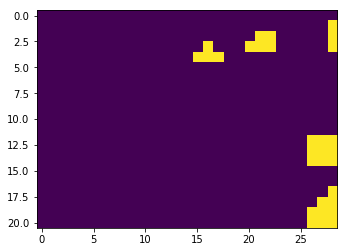

In [52]:
imshow(prediction)